In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def center(X):
    Xcentered = np.array([x - np.mean(x) for x in X])
    return Xcentered 


In [3]:
def augment(X):
    return np.hstack((X,np.ones((np.shape(X)[0],1))))

In [4]:
def predict(Xtest,w,b):
    y = np.sign(np.dot(Xtest,w)+b)
    return(y)

In [5]:
def sgd(X,y,Niter):
    n, p = np.shape(X)
    wp = np.zeros(p+1)
    ones = np.ones((n,1))
    gamma = 0.7
    Xp = np.hstack((X,ones))
    
    for k in range(Niter):
        alpha = np.exp(-gamma*np.log(k+1))# step
        j = np.random.randint(n,size = 1)[0]
        grad = 2*Xp[j]*(y[j]-np.dot(wp,Xp[j]))# - direction
        wp = wp + alpha *grad
        
    return wp[:p], wp[p]



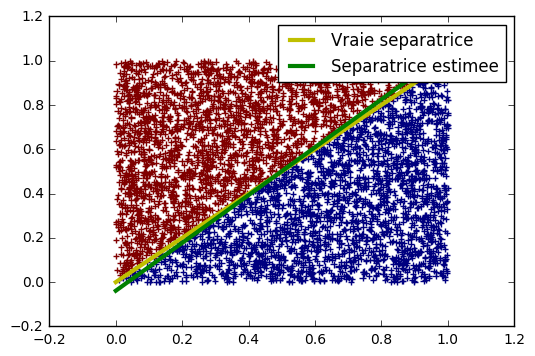

In [6]:
n_samples = 5000
X = np.random.rand(n_samples,2)
w = np.array([-1,1])
y = np.sign(np.dot(X,w))
ws,b = sgd(X,y,10000)
x = np.linspace(np.min(X[:,0]),np.max(X[:,0]))
plt.plot(x,-(w[0]/w[1])*x, color = 'y', linewidth = 3,label = 'Vraie separatrice')
plt.plot(x,-(ws[0]/ws[1])*x - (b/ws[1]), color = 'g', linewidth = 3,label = 'Separatrice estimee')
plt.legend()

plt.scatter(X[:,0],X[:,1],c = y,marker = '+')

plt.show()

Le vecteur $w^{*}$ est presque le même que $\bar{w}$

On essaie maintenant la descente de gradient stochastique sur des données bruitées.

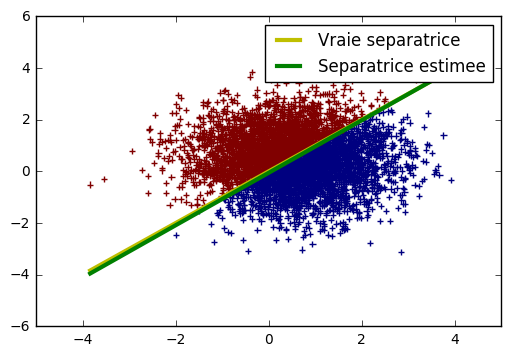

In [7]:
n_samples = 5000
X = np.random.rand(n_samples,2)
X = X + np.random.normal(size = np.shape(X))


w = np.array([-1,1])
y = np.sign(np.dot(X,w))

ws,b = sgd(X,y,10000)
x = np.linspace(np.min(X[:,0]),np.max(X[:,0]))

plt.plot(x,-(w[0]/w[1])*x, color = 'y', linewidth = 3,label = 'Vraie separatrice')
plt.plot(x,-(ws[0]/ws[1])*x - (b/ws[1]), color = 'g', linewidth = 3,label = 'Separatrice estimee')
plt.legend()

plt.scatter(X[:,0],X[:,1],c = y,marker = '+')

plt.show()

Le gradient stochastique sur ce problème fonctionne aussi bien sur les données bruitées que sans bruit

On essaie maintenant la régression l'algorithme sur les données Wisconsin Breast Cancer .

Il faut d'abord normaliser les données à l'aide d'une normalisation min-max ou bien en utilisant les données centrées réduites. Ici la normalisation min-max est plus efficace.


In [8]:
from sklearn import datasets

X,y = datasets.load_breast_cancer(return_X_y = True)
n,p = np.shape(X)

def min_max(X):
    p = np.shape(X)[1]
    mn = X.min(axis = 0)
    mx = X.max(axis = 0)
    Xnorm = np.transpose(np.array([(X[:,j] - mn[j])*(1/(mx[j]-mn[j])) for j in range(p)]))
    return Xnorm,mn,mx



In [9]:
scores = []
for i in range(100):
    training_idx = np.random.randint(n, size=int((2./3.)*n))
    test_idx = np.random.randint(n, size=int((1./3.)*n))

    Xtrain, Xtest ,ytrain, ytest = X[training_idx,:], X[test_idx,:], y[training_idx], y[test_idx]

    Xtrain, mn,mx = min_max(Xtrain)
    Xtest = np.transpose(np.array([(Xtest[:,j] - mn[j])*(1/(mx[j]-mn[j])) for j in range(np.shape(Xtest)[1])]))



    ws,bs  = sgd(Xtrain,ytrain,10000)

    ypred = []
    for x in Xtest:
        scal = np.dot(x , ws) + bs
        ypred += [(np.sign(scal) + 1.)/2.]

    scores.append(1 - np.mean(np.abs(ypred - ytest)))

Le score est défini ici comme la proportion de données correctement classifiées

In [11]:
print('Le score moyen sur 100 essais est de %f avec une variance de %f' %(np.mean(scores),np.std(scores)))

Le score moyen sur 100 essais est de 0.702751 avec une variance de 0.078126
